In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.ion()

In [2]:
with open("./dataset/resnet18/x.data", "rb") as f:
     x = np.load(f)
        
with open("./dataset/resnet18/y.data", "rb") as f:
     y = np.load(f)

In [46]:
print(x.shape)

(40000, 512)


In [8]:
plt.hist(y)

(array([3.6300e+02, 2.2630e+03, 3.5318e+04, 1.6320e+03, 1.6700e+02,
        2.0600e+02, 2.5000e+01, 7.0000e+00, 7.0000e+00, 1.2000e+01]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

In [10]:
import pandas as pd

df = pd.DataFrame()

In [11]:
df['y'] = y

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc108ce1b10>]],
      dtype=object)

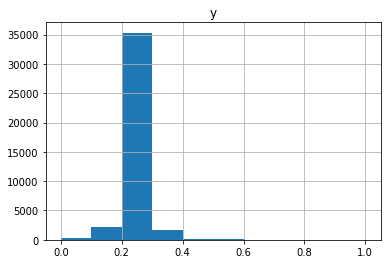

In [13]:
df.hist()

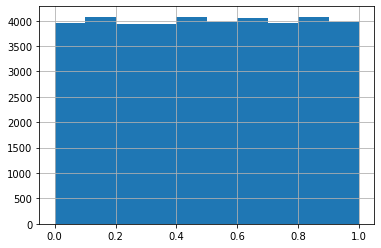

In [22]:
from sklearn.preprocessing import QuantileTransformer

tr = QuantileTransformer()
y_t = tr.fit_transform(y.reshape(-1, 1))

df['y_t'] = y_t
df['y_t'].hist()

In [23]:
import xgboost

regr = xgboost.XGBRegressor()

In [26]:
regr.fit(x, y_t)

[20:32:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [27]:
y_pred = regr.predict(x)

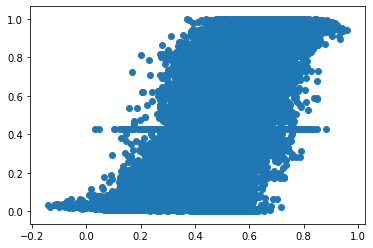

In [28]:
plt.scatter(y_pred, y_t)

In [30]:
np.histogram(y)

(array([  363,  2263, 35318,  1632,   167,   206,    25,     7,     7,
           12]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32))

In [31]:
np.digitize(y, np.histogram(y))

TypeError: Cannot cast array data from dtype('O') to dtype('float64') according to the rule 'safe'

In [36]:
from sklearn.svm import SVR, LinearSVR
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=2)

model = SVR(gamma='scale', epsilon=0.1)

model.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [37]:
from sklearn.metrics import mean_squared_error, max_error

y_pred = model.predict(X_test)
for err in [mean_squared_error, max_error]:
    print(f"Error: {err.__name__}: {err(y_pred, y_test)}")

Error: mean_squared_error: 0.0017554648205349915
Error: max_error: 0.3628825373584892


Text(0, 0.5, 'ground truth')

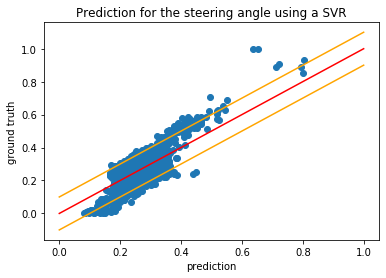

In [38]:
plt.plot([0, 1], [0, 1], color='red')
plt.plot([0, 1], [0.1, 1.1], color='orange')
plt.plot([0, 1], [-0.1, 0.9], color='orange')
plt.scatter(y_pred, y_test)
plt.title(f"Prediction for the steering angle using a {type(model).__name__}")
plt.xlabel("prediction")
plt.ylabel("ground truth")

In [51]:
import torchvision.models as models
import torch.nn as nn
import torch

feat_model = models.resnet18(pretrained=True)

# Strip the last linear layer
feat_model.fc = nn.Sequential()

In [52]:
import datautil
import importlib
importlib.reload(datautil)
from PIL import Image

In [60]:
p = datautil.Pipeline(feat_model, model)

test_img = Image.open("/tmp/img.jpg")

In [61]:
_, _, scaler = datautil.create_loader(None)

In [63]:
scaler.inverse_transform(p.predict([test_img.convert("RGB")]).reshape(-1, 1))

torch.Size([1, 512])


array([[-26.63917953]])